<a href="https://colab.research.google.com/github/Ashwathiii/Online-payment-fraud-detection-/blob/main/PRO_NEW_onlinepaymentfrauddetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,ConfusionMatrixDisplay



In [ ]:
#loading the dataset
dff=pd.read_csv("/content/drive/MyDrive/PROJECT/PS_20174392719_1491204439457_log.csv")
dff

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
#dropping irrelevant columns
dff.drop(['nameOrig','nameDest','isFlaggedFraud','step'],axis=1,inplace=True)
dff

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1


In [ ]:
#checking for missing values
dff.isna().sum()

type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [ ]:
#dropping duplicates if any
dff.drop_duplicates(inplace=True)
dff.reset_index(drop=True,inplace=True)
# dff

In [ ]:
dff['isFraud'].value_counts()

0    6256588
1       8152
Name: isFraud, dtype: int64

In [ ]:
#loading only fraud classes
df1=dff.loc[dff['isFraud']==1]
df1

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,TRANSFER,181.00,181.00,0.0,0.00,0.00,1
3,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1
251,TRANSFER,2806.00,2806.00,0.0,0.00,0.00,1
252,CASH_OUT,2806.00,2806.00,0.0,26202.00,0.00,1
680,TRANSFER,20128.00,20128.00,0.0,0.00,0.00,1
...,...,...,...,...,...,...,...
6264735,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1
6264736,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1
6264737,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6264738,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1


In [ ]:
#loading notfraud classes
df2=dff.loc[dff['isFraud']==0]
df2

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.00,0.00,0
1,PAYMENT,1864.28,21249.0,19384.72,0.00,0.00,0
4,PAYMENT,11668.14,41554.0,29885.86,0.00,0.00,0
5,PAYMENT,7817.71,53860.0,46042.29,0.00,0.00,0
6,PAYMENT,7107.77,183195.0,176087.23,0.00,0.00,0
...,...,...,...,...,...,...,...
6264445,PAYMENT,8634.29,518802.0,510167.71,0.00,0.00,0
6264446,CASH_OUT,159188.22,3859.0,0.00,0.00,159188.22,0
6264447,CASH_OUT,186273.84,168046.0,0.00,24893.67,211167.51,0
6264448,TRANSFER,82096.45,13492.0,0.00,0.00,82096.45,0


In [ ]:
#concatenating both class labels
df=pd.concat([df1.head(5000),df2.head(5000)],ignore_index=True)
df

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
2,TRANSFER,2806.00,2806.0,0.00,0.0,0.0,1
3,CASH_OUT,2806.00,2806.0,0.00,26202.0,0.0,1
4,TRANSFER,20128.00,20128.0,0.00,0.0,0.0,1
...,...,...,...,...,...,...,...
9995,PAYMENT,8392.42,0.0,0.00,0.0,0.0,0
9996,PAYMENT,3042.06,0.0,0.00,0.0,0.0,0
9997,PAYMENT,14144.91,0.0,0.00,0.0,0.0,0
9998,PAYMENT,11089.05,0.0,0.00,0.0,0.0,0


In [ ]:
df['isFraud'].value_counts()

1    5000
0    5000
Name: isFraud, dtype: int64

In [ ]:
df['type'].value_counts()

CASH_OUT    3105
TRANSFER    2923
PAYMENT     2613
CASH_IN     1096
DEBIT        263
Name: type, dtype: int64

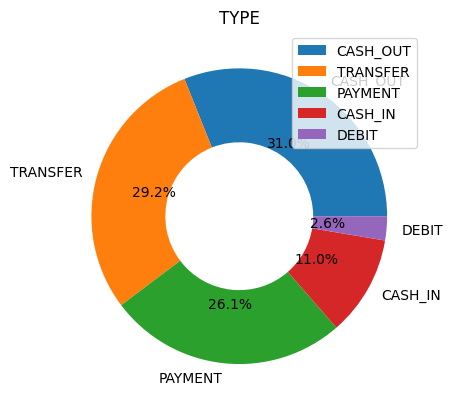

In [ ]:
data=df['type'].value_counts()
wedgeprops = {'width': 0.5}
plt.pie(data,labels=data.index,autopct='%1.1f%%',wedgeprops=wedgeprops)
plt.title('TYPE')
plt.legend()
# sns.countplot(x='type',data=df)

<Axes: xlabel='type', ylabel='amount'>

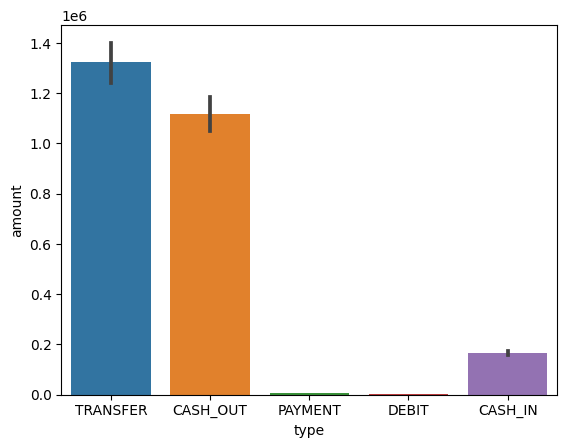

In [ ]:
sns.barplot(x='type',y='amount',data=df)

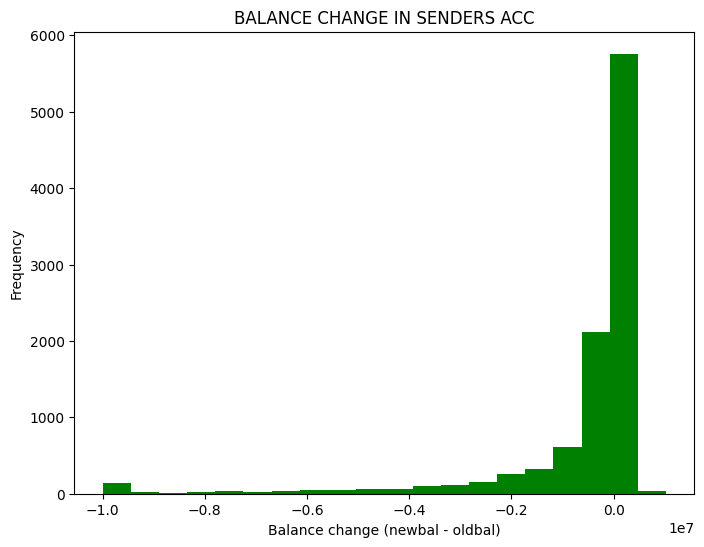

In [ ]:
oldbal = df['oldbalanceOrg']
newbal = df['newbalanceOrig']
balance_changes = newbal - oldbal
plt.figure(figsize=(8, 6))
plt.hist(balance_changes, bins=20, color='green')
plt.xlabel('Balance change (newbal - oldbal)')
plt.ylabel('Frequency')
plt.title('BALANCE CHANGE IN SENDERS ACC')
plt.show()

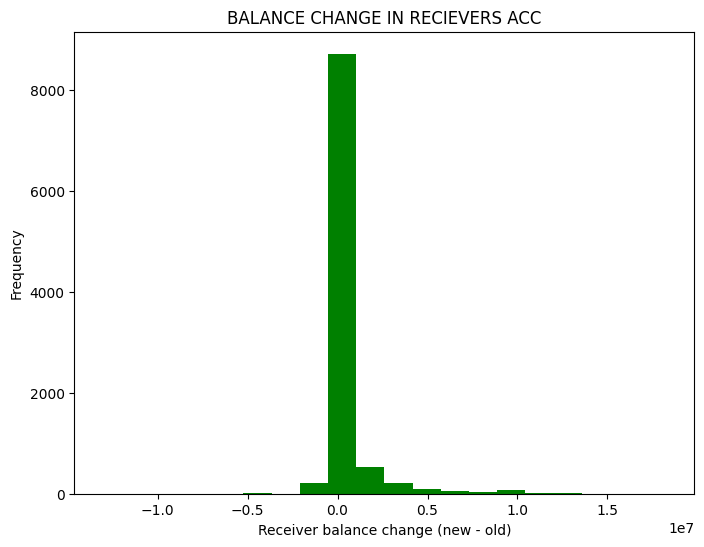

In [ ]:
rec_oldbal = df['oldbalanceDest']
rec_newbal = df['newbalanceDest']
rec_balchange = rec_newbal-rec_oldbal
plt.figure(figsize=(8, 6))
plt.hist(rec_balchange, bins=20, color='green')
plt.xlabel('Receiver balance change (new - old)')
plt.ylabel('Frequency')
plt.title('BALANCE CHANGE IN RECIEVERS ACC')
plt.show()

In [ ]:
df.dtypes

type               object
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

In [ ]:

le=LabelEncoder()
df['type']=le.fit_transform(df['type'])
df.dtypes


type                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

In [ ]:
df.corr()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
type,1.000000,0.060906,-0.196242,-0.332975,-0.293233,-0.340155,0.129541
amount,0.060906,1.000000,0.693304,0.101171,-0.003765,0.280631,0.377518
oldbalanceOrg,-0.196242,0.693304,1.000000,0.782172,0.117032,0.236767,0.089493
newbalanceOrig,-0.332975,0.101171,0.782172,1.000000,0.194323,0.113937,-0.220503
oldbalanceDest,-0.293233,-0.003765,0.117032,0.194323,1.000000,0.848414,-0.098552
newbalanceDest,-0.340155,0.280631,0.236767,0.113937,0.848414,1.000000,0.018446
isFraud,0.129541,0.377518,0.089493,-0.220503,-0.098552,0.018446,1.000000


<Axes: >

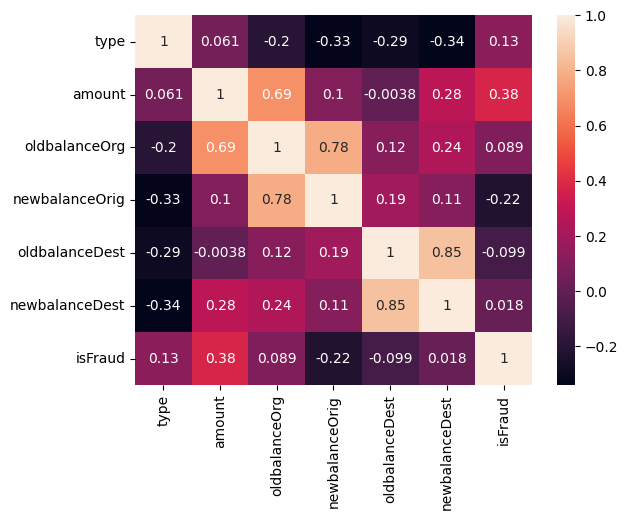

In [ ]:
#corr btw diff data set
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.describe()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000
mean,2.316200,7.537092e+05,1.303903e+06,6.164161e+05,7.063831e+05,1.119456e+06,0.500000
std,1.442091,1.744656e+06,2.817902e+06,2.106152e+06,2.237981e+06,2.798998e+06,0.500025
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.000000,9.299460e+03,1.942177e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,3.000000,1.173013e+05,1.542060e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.500000
75%,4.000000,4.960258e+05,1.150717e+06,2.122821e+04,2.536678e+05,7.379280e+05,1.000000
max,4.000000,1.000000e+07,5.958504e+07,4.958504e+07,3.296166e+07,3.464570e+07,1.000000


In [ ]:
#Splitting DS into feature var and target var
X=df.iloc[0:,:-1]
X

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,4,181.00,181.0,0.00,0.0,0.0
1,1,181.00,181.0,0.00,21182.0,0.0
2,4,2806.00,2806.0,0.00,0.0,0.0
3,1,2806.00,2806.0,0.00,26202.0,0.0
4,4,20128.00,20128.0,0.00,0.0,0.0
...,...,...,...,...,...,...
9995,3,8392.42,0.0,0.00,0.0,0.0
9996,3,3042.06,0.0,0.00,0.0,0.0
9997,3,14144.91,0.0,0.00,0.0,0.0
9998,3,11089.05,0.0,0.00,0.0,0.0


In [ ]:
y=df.iloc[:,-1]
y

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: isFraud, Length: 10000, dtype: int64

In [ ]:
#feature scaling
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X

array([[1.00000000e+00, 1.81000000e-05, 3.03767521e-06, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.50000000e-01, 1.81000000e-05, 3.03767521e-06, 0.00000000e+00,
        6.42625436e-04, 0.00000000e+00],
       [1.00000000e+00, 2.80600000e-04, 4.70923571e-05, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       ...,
       [7.50000000e-01, 1.41449100e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [7.50000000e-01, 1.10890500e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [7.50000000e-01, 2.51975000e-04, 4.25190616e-04, 4.60123655e-04,
        0.00000000e+00, 0.00000000e+00]])

In [ ]:
#traintestsplit
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=14)

In [ ]:
#importing required classifiers and initializing the objects for the classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
knn=KNeighborsClassifier(n_neighbors=5)
sv=SVC()
rf=RandomForestClassifier(random_state=14)
ad=AdaBoostClassifier(random_state=14)
lr=LogisticRegression()
nb=GaussianNB()
dt=DecisionTreeClassifier(criterion="entropy")

************* KNeighborsClassifier() *****************
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1501
           1       0.93      0.99      0.96      1499

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000

Accuracy: 95.96666666666667
************* SVC() *****************
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      1501
           1       0.84      1.00      0.92      1499

    accuracy                           0.91      3000
   macro avg       0.92      0.91      0.91      3000
weighted avg       0.92      0.91      0.91      3000

Accuracy: 90.8
************* RandomForestClassifier(random_state=14) *****************
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1501
           1       0.99      

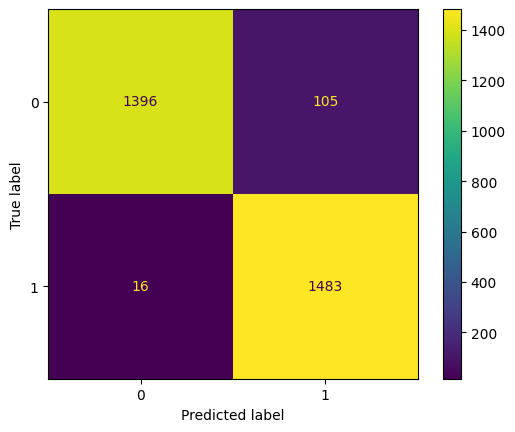

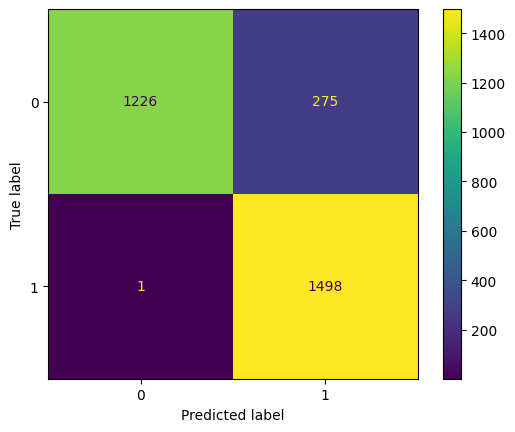

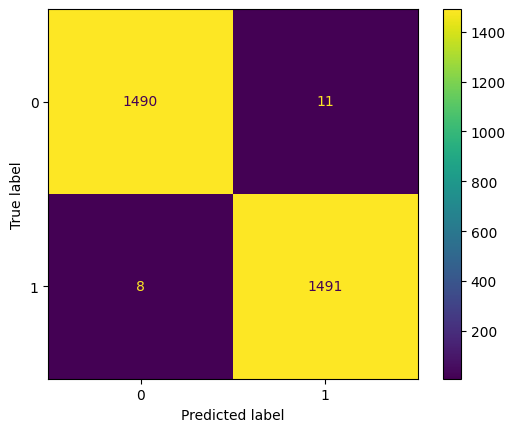

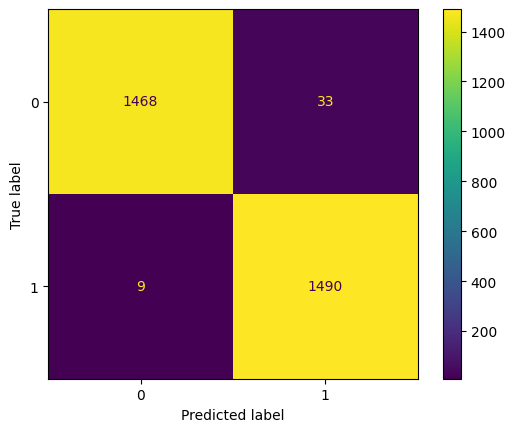

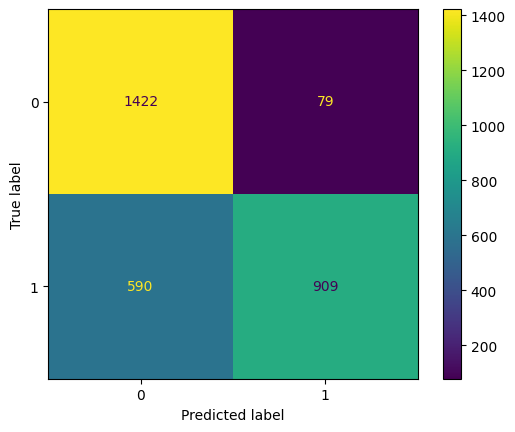

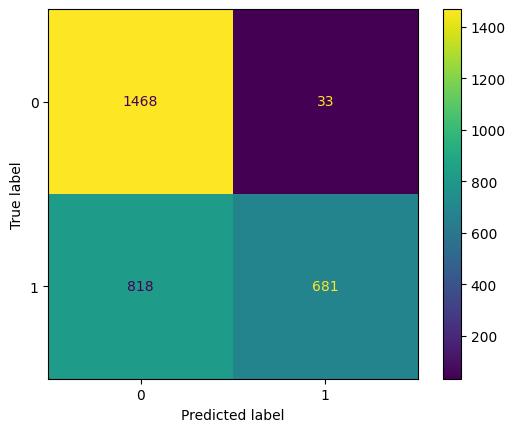

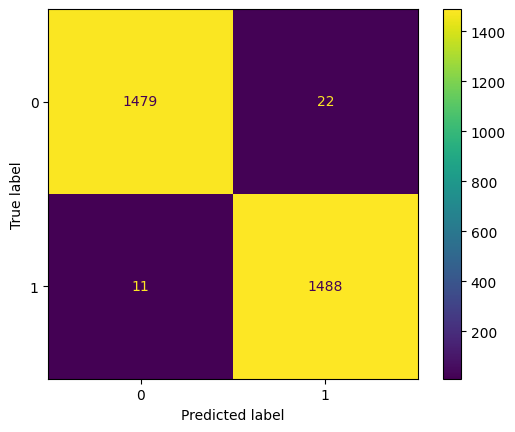

In [ ]:
#model training and evaluation
models = [knn, sv, rf, ad, lr, nb, dt]
results = []
for i in models:
    print("*************", i, "*****************")
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    y_pred
    accuracy = accuracy_score(y_test, y_pred)*100
    model_name = str(i)
    results.append({'Model': model_name, 'Accuracy': accuracy})
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy)
    print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))


In [ ]:
results_df = pd.DataFrame(results)
print("Accuracy Results:")
print(results_df)

Accuracy Results:
                                         Model   Accuracy
0                       KNeighborsClassifier()  95.966667
1                                        SVC()  90.800000
2      RandomForestClassifier(random_state=14)  99.366667
3          AdaBoostClassifier(random_state=14)  98.600000
4                         LogisticRegression()  77.700000
5                                 GaussianNB()  71.633333
6  DecisionTreeClassifier(criterion='entropy')  98.900000


In [ ]:
d=({'Actual':y_test,'Predicted':y_pred})
dd=pd.DataFrame(d)
dd

,Actual,Predicted
5431,0,0
4771,1,1
1385,1,1
8091,0,0
9202,0,0
...,...,...
8521,0,0
4259,1,1
2739,1,1
7471,0,1


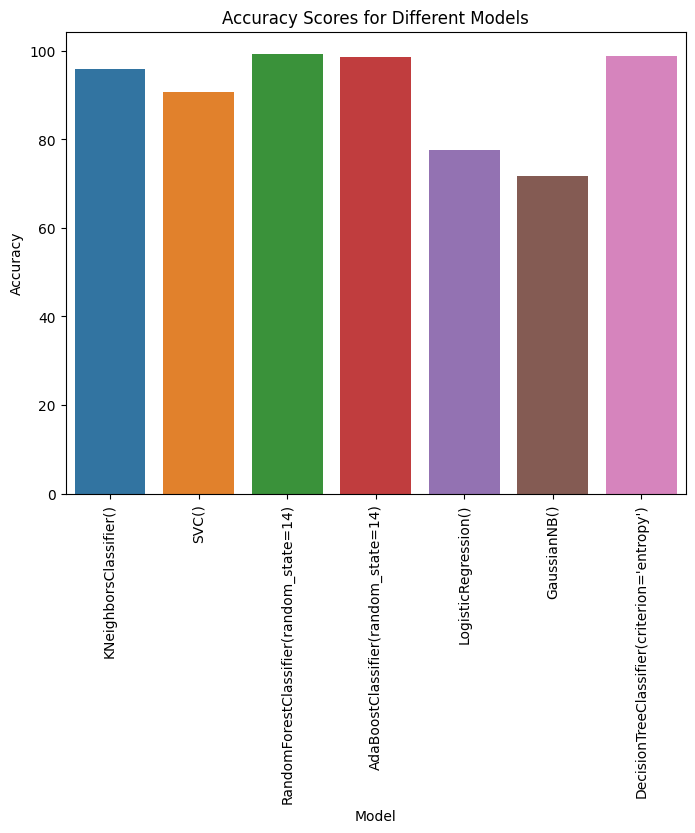

In [ ]:
# Creating a bar plot using seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Different Models')
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')
y_new = rf.predict(scaler.transform([[4,	2806.00, 2806.0,	0.00,	0.0,	0.0]]))  #( [[4,181.00,	181.0,	0.00,	0.0, 0.0]])
if y_new == 1:
    print("Fraud")
else:
    print("Not Fraud")

Fraud


In [ ]:
y_new = rf.predict(scaler.transform([[3,	2519.75,	25335.0,	22815.25,	0.0,	0.0]]))#([[3,	3042.06,	0.0,	0.00,	0.0,	0.0]]) )    #([[3, 14144.91,	0.0,	0.00,	0.0,	0.0]])  #([[3,	11089.05,	0.0,	0.00,	0.0,	0.0]])
if y_new == 1:
    print("Fraud")
else:
    print("Not Fraud")

Not Fraud


In [ ]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
rf1=RandomForestClassifier()
parametr={'n_estimators':[100,200],'max_depth':[None,10,20],'min_samples_split':[2,5]}  #The number of trees in the forest.depth,The minimum number of samples required to split an internal node:
clf=GridSearchCV(rf1,parametr,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [ ]:
print(clf.best_params_)

{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
rfnew=RandomForestClassifier(max_depth= None, min_samples_split= 5, n_estimators= 100)
rfnew.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=5)

In [ ]:
ypred_new=rfnew.predict(X_test)
ypred_new

array([0, 1, 1, ..., 1, 0, 1])

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1501
           1       0.99      0.99      0.99      1499

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000

99.3


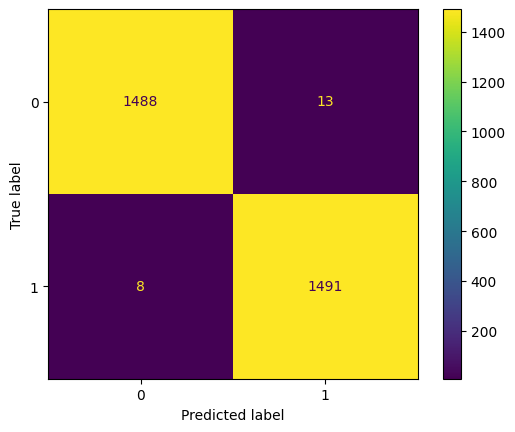

In [ ]:
print(classification_report(y_test,ypred_new))
print(accuracy_score(y_test,ypred_new)*100)
print(ConfusionMatrixDisplay.from_predictions(y_test,ypred_new))